# Visualization: Time Series

These models were trained using time series data. so there shouldn't be any leakage. 

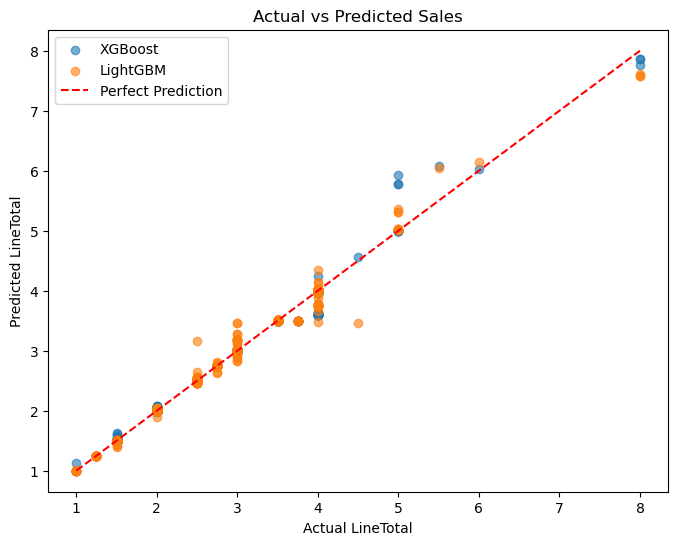

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load predictions
preds = pd.read_csv("model_predictions.csv")

# Scatter plot: Actual vs Predictions
plt.figure(figsize=(8,6))
plt.scatter(preds["actual"], preds["xgboost_pred"], alpha=0.6, label="XGBoost")
plt.scatter(preds["actual"], preds["lightgbm_pred"], alpha=0.6, label="LightGBM")
plt.plot([preds["actual"].min(), preds["actual"].max()],
         [preds["actual"].min(), preds["actual"].max()],
         color="red", linestyle="--", label="Perfect Prediction")

plt.xlabel("Actual LineTotal")
plt.ylabel("Predicted LineTotal")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


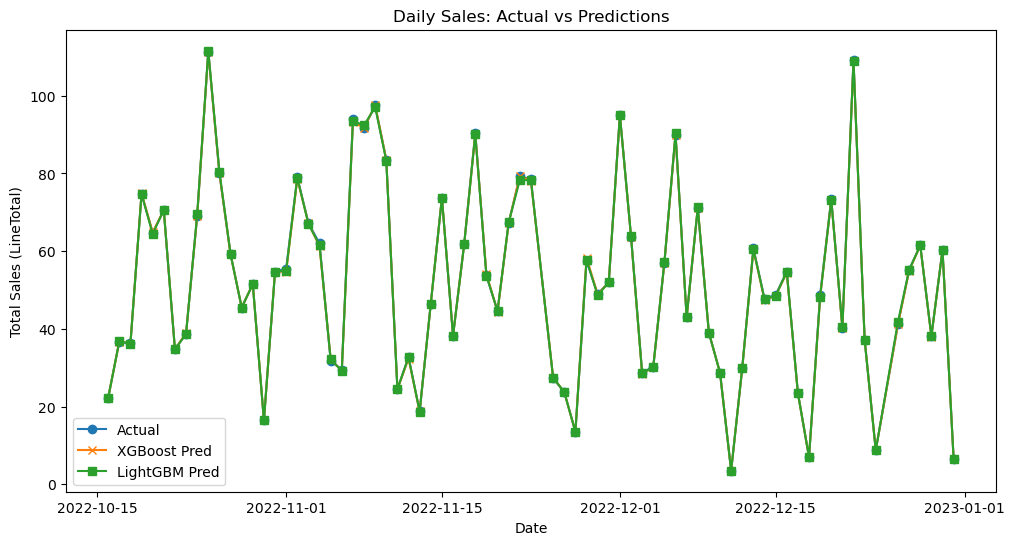

In [3]:
# Load predictions again
preds = pd.read_csv("model_predictions.csv")
preds["TransDate"] = pd.to_datetime(preds["TransDate"])

# Aggregate by date (sum all products for daily sales)
daily = preds.groupby("TransDate").agg({
    "actual": "sum",
    "xgboost_pred": "sum",
    "lightgbm_pred": "sum"
}).reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily["TransDate"], daily["actual"], label="Actual", marker="o")
plt.plot(daily["TransDate"], daily["xgboost_pred"], label="XGBoost Pred", marker="x")
plt.plot(daily["TransDate"], daily["lightgbm_pred"], label="LightGBM Pred", marker="s")

plt.xlabel("Date")
plt.ylabel("Total Sales (LineTotal)")
plt.title("Daily Sales: Actual vs Predictions")
plt.legend()
plt.show()

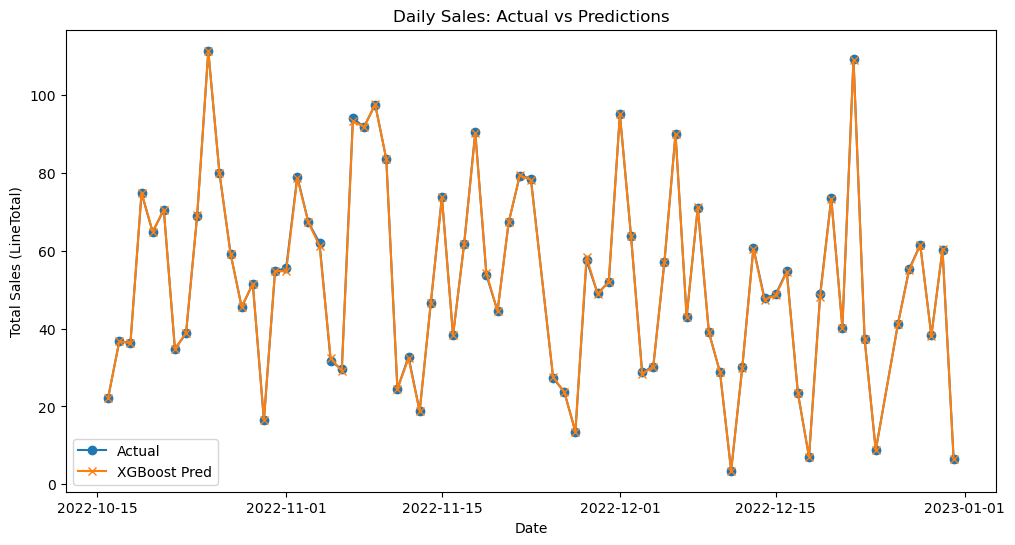

In [4]:
# Aggregate by date (sum all products for daily sales)
daily = preds.groupby("TransDate").agg({
    "actual": "sum",
    "xgboost_pred": "sum",
}).reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily["TransDate"], daily["actual"], label="Actual", marker="o")
plt.plot(daily["TransDate"], daily["xgboost_pred"], label="XGBoost Pred", marker="x")

plt.xlabel("Date")
plt.ylabel("Total Sales (LineTotal)")
plt.title("Daily Sales: Actual vs Predictions")
plt.legend()
plt.show()


In [ ]:
# Aggregate by date (sum all products for daily sales)
daily = preds.groupby("TransDate").agg({
    "actual": "sum",
}).reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(daily["TransDate"], daily["actual"], label="Actual", marker="o")

plt.xlabel("Date")
plt.ylabel("Total Sales (LineTotal)")
plt.title("Daily Sales: Actual vs Predictions")
plt.legend()
plt.show()
